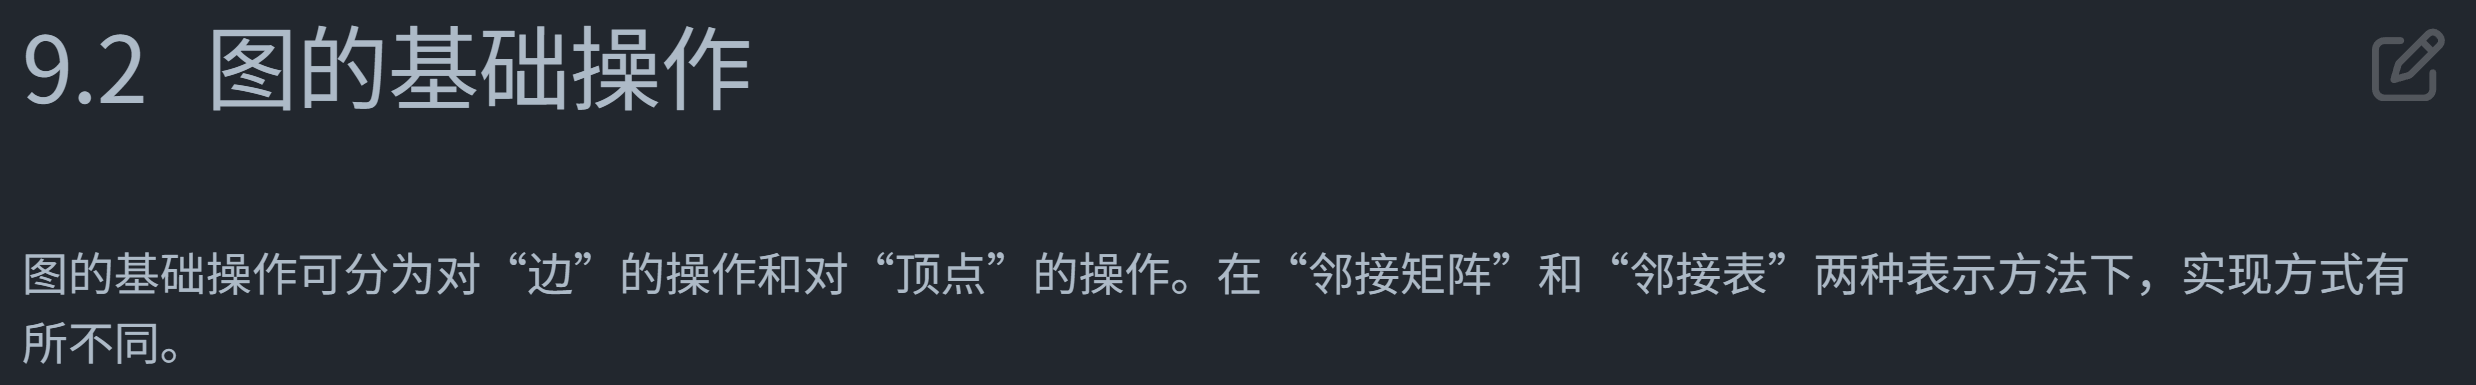
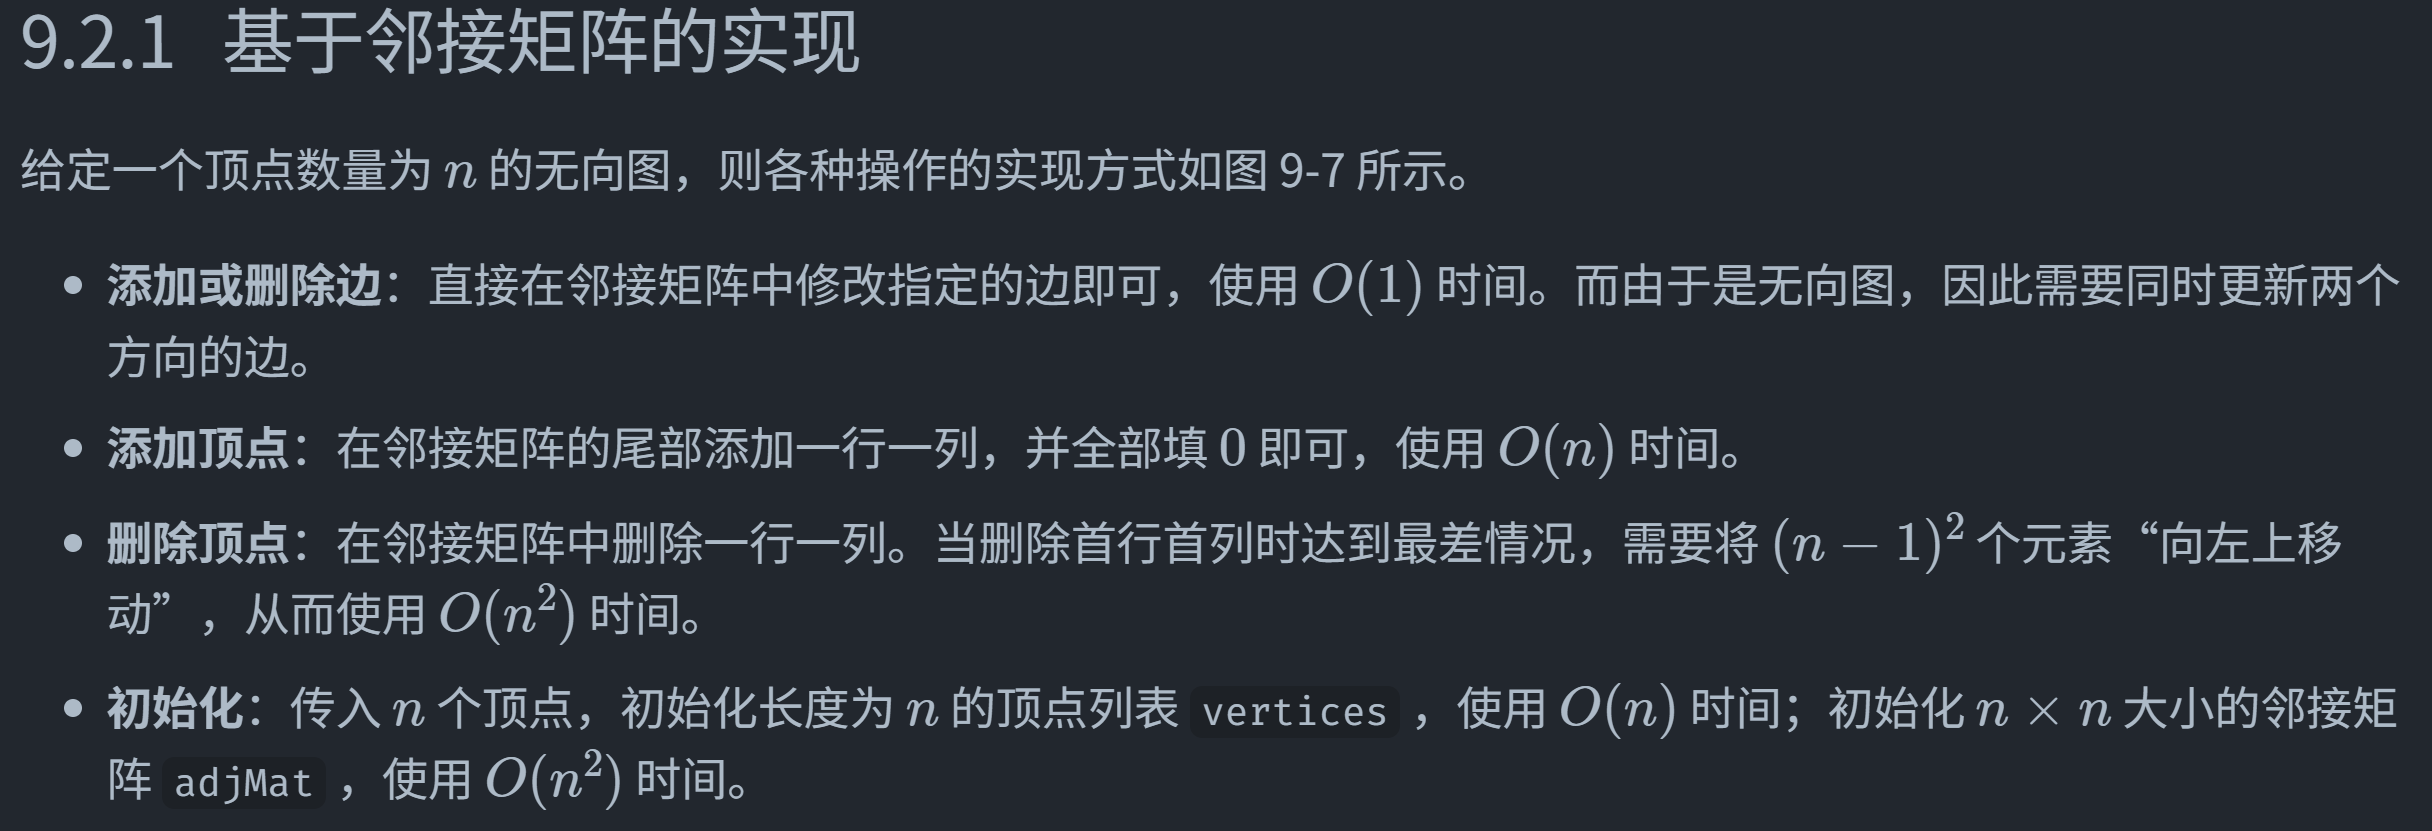

以下是基于邻接矩阵表示图的实现代码：

In [3]:
class GraphAdjMat():
    """基于邻接矩阵实现的无向图类"""
    
    def __init__(self, vertices: list[int], edges: list[list[int]]):
        # 顶点列表，元素代表“顶点值”，索引代表“顶点索引”
        self.vertices: list[int] = vertices
        # 临界矩阵，行列索引对应“顶点索引”
        self.adj_mat: list[list[int]] = []
        # 添加顶点
        for val in vertices:
            self.add_vertex(val)
        # 添加边
        for e in edges:
            self.add_edge(e[0], e[1])
        
    def add_vertex(self, val: int):
        """添加顶点"""
        n = self.size()
        # 向顶点列表中添加新顶点的值
        self.vertices.append(val)
        # 在邻接矩阵中添加一行
        new_row = [0] * n
        self.adj_mat.append(new_row)
        # 在邻接矩阵中添加一列
        for row in self.adj_mat:
            row.append(0)
            
    def add_edge(self, i: int, j: int):
        """添加边"""
        # 参数 i j 对应 vertices 元素索引
        # 索引越界与相等处理
        if i < 0 or j < 0 or i >= self.size() or j >= self.size() or i == j:
            raise IndexError()
        # 在无向图中，邻接矩阵关于主对角线对称，即满足 (i, j) == (j, i)
        self.adj_mat[i][j] = 1
        self.adj_mat[j][i] = 1
    
    def size(self):
        """获取顶点的数量"""
        return len(self.vertices)

    def remove_vertex(self, index: int):
        """删除顶点"""
        if index >= self.size():
            raise IndexError()
        # 在顶点列表中删除索引 index 的顶点
        self.vertices.pop(index)
        # 在邻接矩阵中删除索引 index 的行
        self.adj_mat.pop(index)
        # 在邻接矩阵中删除索引 index 的列
        for row in self.adj_mat:
            row.pop(index)

    def remove_edge(self, i: int, j: int):
        """删除边"""
        # 参数 i j 对应 vertices 元素索引
        # 索引越界与相等处理
        if i < 0 or i > self.size() or j < 0 or j > self.size() or i == j:
            raise IndexError()
        self.adj_mat[i][j] = 0
        self.adj_mat[j][i] = 0
    
    # def print(self):        
    #     """打印邻接矩阵"""        
    #     print("顶点列表 = ", self.vertices)
    #     print("临界矩阵 = ")
    #     print_matrix(self.adj_mat)

In [4]:
"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    vertices = [1, 3, 2, 5, 4]
    edges = [[0, 1], [0, 3], [1, 2], [2, 3], [2, 4], [3, 4]]
    graph = GraphAdjMat(vertices, edges)

    # 添加边
    # 顶点 1, 2 的索引分别为 0, 2
    graph.add_edge(0, 2)

    # 删除边
    # 顶点 1, 3 的索引分别为 0, 1
    graph.remove_edge(0, 1)

    # 添加顶点
    graph.add_vertex(6)

    # 删除顶点
    # 顶点 3 的索引为 1
    graph.remove_vertex(1)

KeyboardInterrupt: 

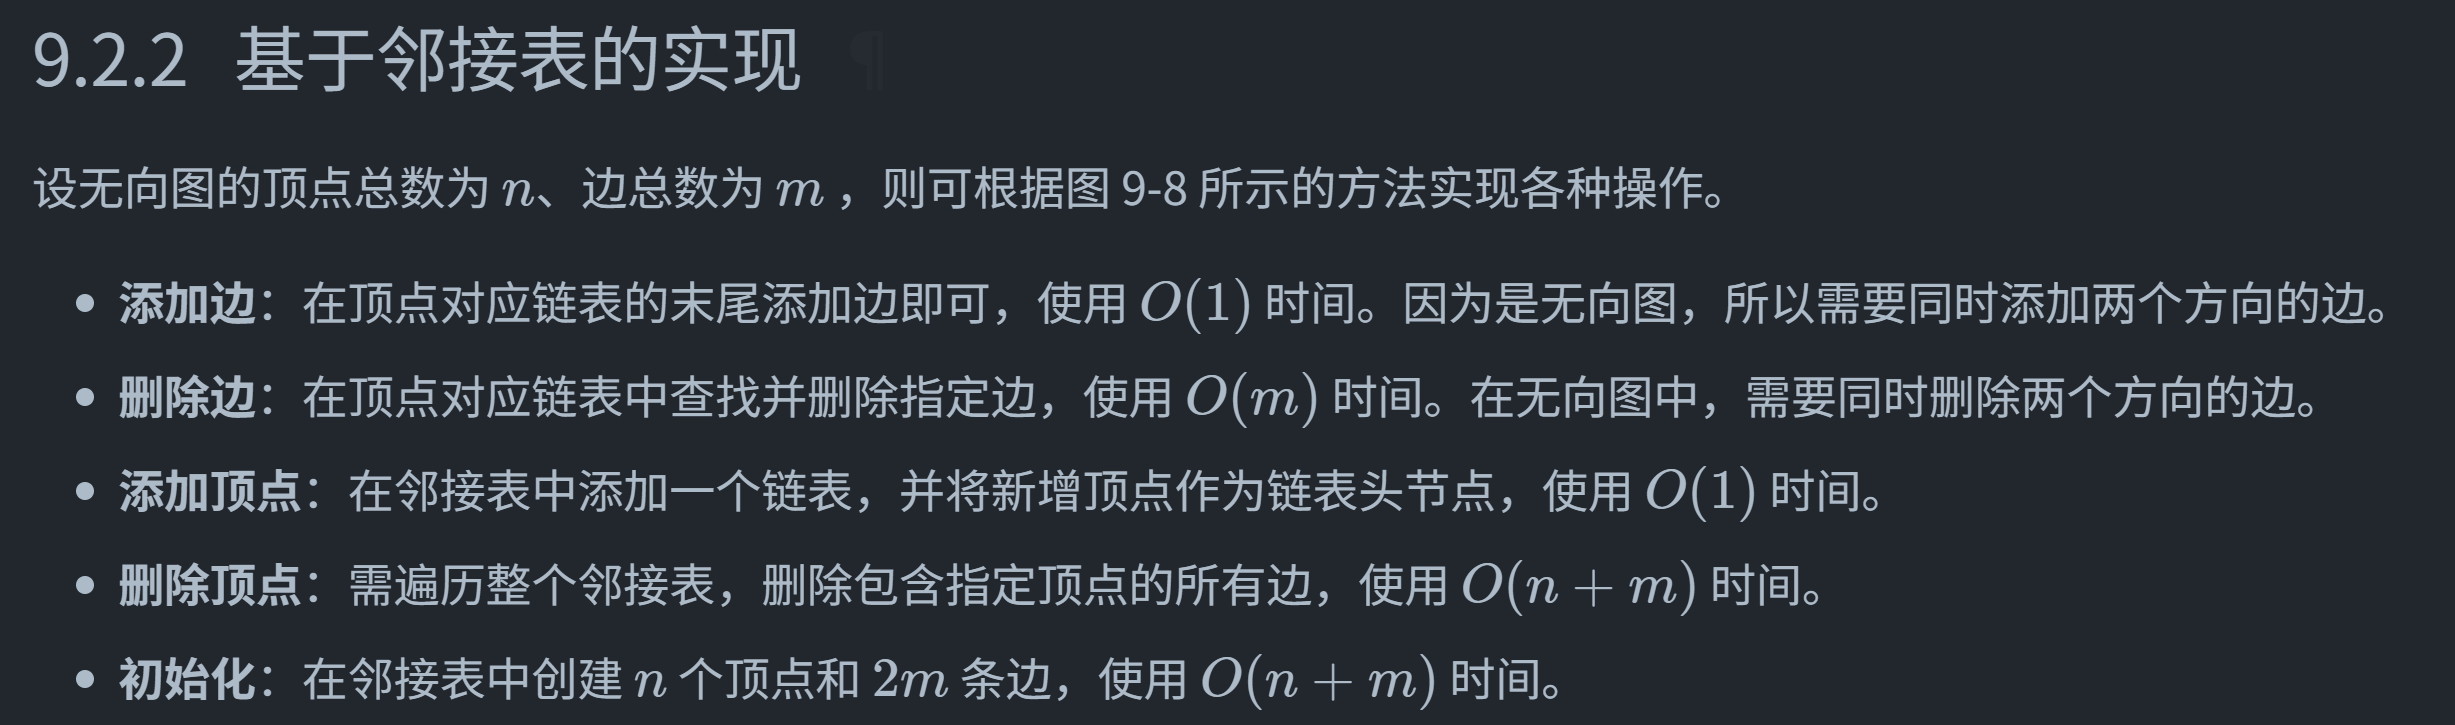
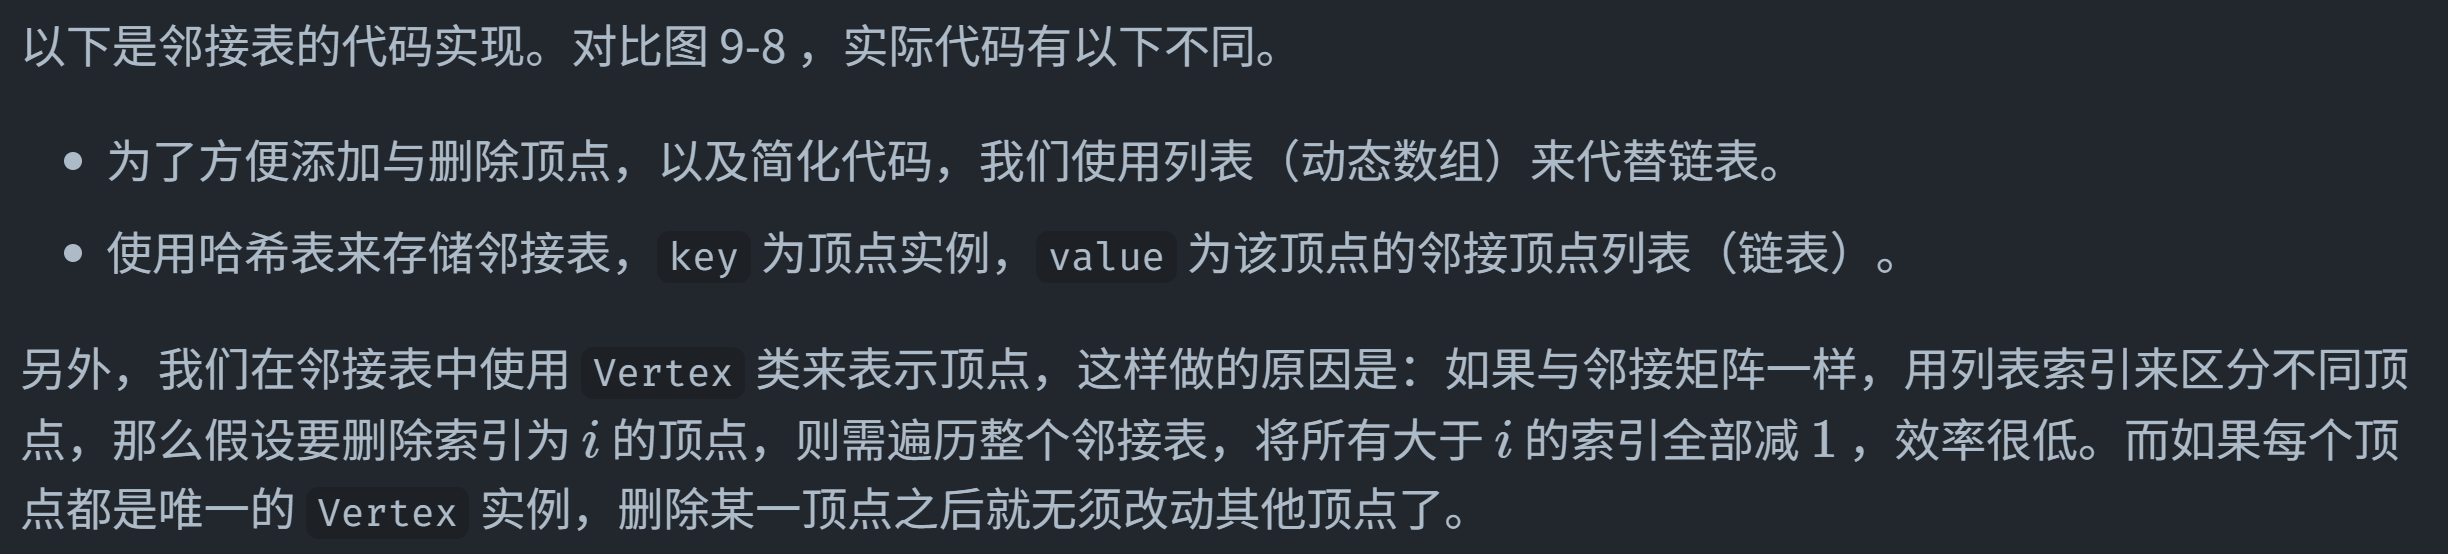

In [20]:
class Vertex():
    """顶点类"""
    def __init__(self, val: int):
        self.val = val
        
def vals_to_vets(vals: list[int]) -> list["Vertex"]:
    """输入值列表 vals , 返回顶点列表 vets"""
    return [Vertex(val) for val in vals]

class GraphAdjList():
    """基于邻接表实现的无向图类"""
    def __init__(self, edges: list[list[Vertex]]) -> None:
        # 邻接表，key：顶点，value：该顶点的所有邻接顶点
        self.adj_list: dict[Vertex, list[Vertex]] = dict()
        # 添加所有顶点和边
        for edge in edges:
            self.add_vertex(edge[0])
            self.add_vertex(edge[1])
            self.add_edge(edge[0], edge[1])
    
    def size(self):
        """获取顶点的数量"""
        return len(self.adj_list.keys())
    
    def add_edge(self, vet1: Vertex, vet2: Vertex):
        """添加边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise IndexError()
        # vet1 - vet2
        self.adj_list[vet1].append(vet2)
        self.adj_list[vet2].append(vet1)
        
    def remove_edge(self, vet1: Vertex, vet2: Vertex):
        """删除边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise IndexError()
        # del
        self.adj_list[vet1].remove(vet2)
        self.adj_list[vet2].remove(vet1)
    
    def add_vertex(self, vet: Vertex):
        """添加节点"""
        if vet in self.adj_list:
            return
        # 在邻接表中添加一个新节点的新链表
        self.adj_list[vet] = []
    
    def remove_vertex(self, vet: Vertex):
        """删除顶点"""
        if vet not in self.adj_list:
            raise ValueError()
        self.adj_list.pop(vet)
        # 删除所有包含vet的边
        for vertex in self.adj_list:
            if vet in self.adj_list[vertex]:
                self.adj_list[vertex].remove(vet)
    
    def print(self):
        """打印"""
        print("邻接表 = ")
        for vertex in self.adj_list:
            tmp = [v.val for v in self.adj_list[vertex]]
            print(f"{vertex.val}: {tmp}, ")                                                

In [21]:
"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    v = vals_to_vets([1, 3, 2, 5, 4])
    edges = [
        [v[0], v[1]],
        [v[0], v[3]],
        [v[1], v[2]],
        [v[2], v[3]],
        [v[2], v[4]],
        [v[3], v[4]],
    ]
    graph = GraphAdjList(edges)
    del edges
    
    print("size: ", graph.size())

    # 添加边
    graph.add_edge(v[0], v[2])

    # 删除边
    graph.remove_edge(v[0], v[1])

    # 添加顶点
    v5 = Vertex(6)
    graph.add_vertex(v5)

    # 删除顶点
    graph.remove_vertex(v[1])

size:  5


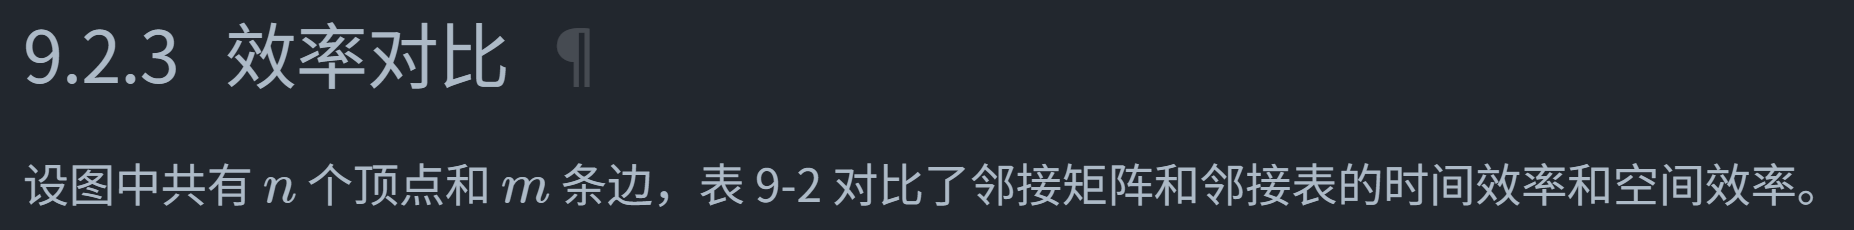
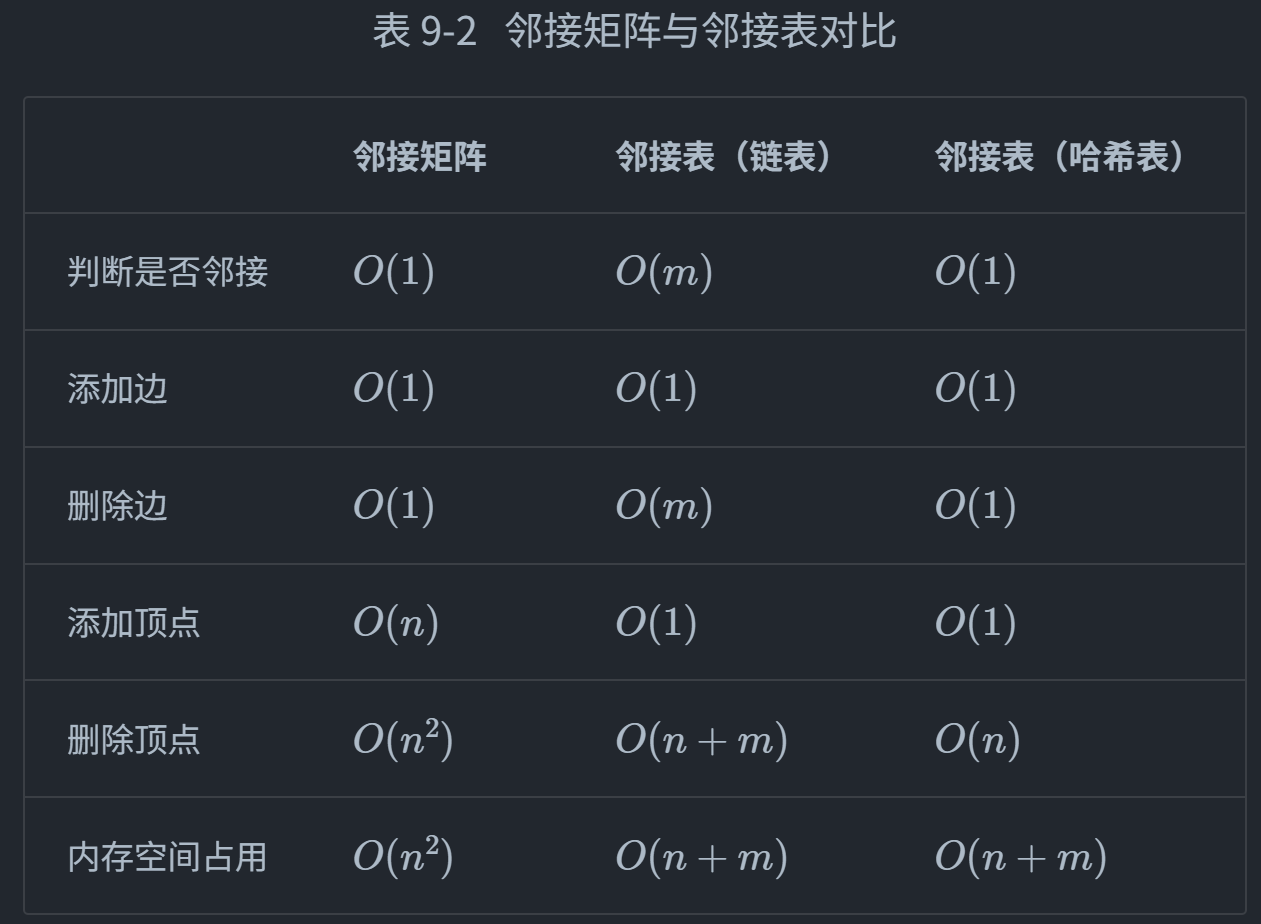

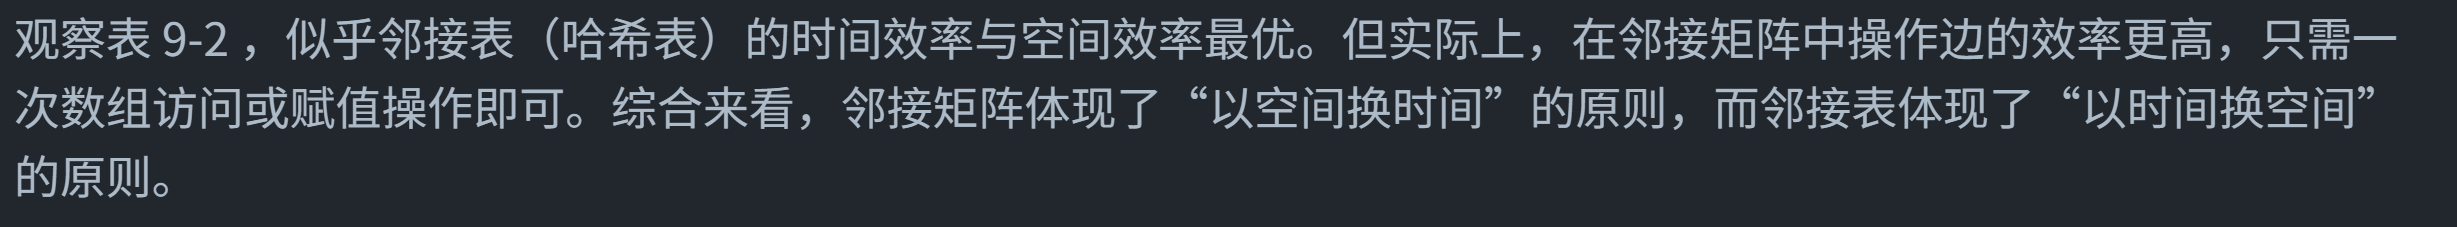